In [1]:
from collections import OrderedDict

def get_topics(unumber='u1018264'):
    return set(list(OrderedDict(zip(reversed(unumber), reversed(unumber))).keys())[:2])

get_topics('u6724645')

{'4', '5'}

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

import time

In [2]:
def image_to_vector(png_image, xy=True):  
#     xy = True ----> feature vectors with x-y coordinates
#     xy = False ----> feature vectors without x-y coordinates
    

    # Convert to L*a*b* representation
    lab_im = cv2.cvtColor(png_image, cv2.COLOR_RGB2Lab)
    
    # Store shape of image
    nrows, ncols = lab_im.shape[:2]
    
    # Create L*, a*, b* 1-D arrays corresponding to each of the image pixels
    L = lab_im[:,:, 0].flatten()
    a = lab_im[:,:, 1].flatten()
    b = lab_im[:,:, 2].flatten()
    
    if xy:
        # Returns a 1-D array corresponding to x-coordinates of pixels
        x = []
        for i in range(nrows):
            x += [i] * ncols
        x = np.array(x).flatten()

        # Returns a 1-D array corresponding to y-coordinates of pixels
        y = list(range(ncols)) * nrows
        y = np.array(y)
        
        # Features to include in output vector
        features = [L, a, b, x, y]
    
    else:    
        # Features to include in output vector
        features = [L,a,b]
        
    # Return output vector as numpy array
    image_vector = np.array(features).T
    
    return image_vector, nrows, ncols

def random_init(k, data):
    
    # The while loop ensures that all the selected datapoints are unique
    size=0  # Number of unique centroid ids
    while size != k:
        centroid_ids = np.random.randint(low=0, high=len(data), size=k)  # Generate k random indices
        size = len(set(centroid_ids))   # We want k unique indices
    
    # Centroids are selected using the random indices
    centroids = data[centroid_ids, :]

    return centroids

def dist_from_centroid(data, centroid):
    return ((data - centroid) ** 2).sum(axis=1)

def my_kmeans_plus_init(k, data):
    
    # Step 1: Select a random datapoint from the data as a centroid
    centroids = data[np.random.randint(low=0, high=nrows),:]
    centroids

    for iteration in range(k-1):

        # Step 2 : Calculate distance of all datapoints to the closest centroid
        # a) Calculate distance from each centroid
        distance = np.array([dist_from_centroid(data, centroids[i]) for i in range(len(centroids))])
        # b) Store the smallest centroid distance for each datapoint
        distance = distance.min(axis=0)

        # Step 3 : Select the datapoint with maximum distance from initial centroid
        new_centroid = data[distance.argmax()]
        centroids = np.vstack((centroids, new_centroid))

    return centroids

def E_step(C, data):
    
    # k = number of cluster centres
    k = len(C)
    
    # Calculate distance matrix i.e. euclidean distance of each pixel from each centroid
    dist_matrix = ((data - C[:, None])**2).sum(axis=2).T
        
    # Determine closest cluster centers
    labels = dist_matrix.argmin(axis=1)
    
    return labels

def M_step(C, L, data):
    
    # k = number of cluster centres
    k = len(C)
    
    # Update centroids for each of the k clusters (according to cluster labels, L)
    updated_centroids = [data[L==i].mean(axis=0) for i in range(k)]
    updated_centroids = np.array(updated_centroids)  
    
    return updated_centroids

def my_kmeans(k, data, init_method, max_iterations=25):
    
    num_features = data.shape[1]
    
    if init_method == 'random':
        old_centroids = random_init(k, data)
    elif init_method == 'kmeans++':
        old_centroids = my_kmeans_plus_init(k, data)
    
    for i in range(max_iterations):
        
        L = E_step(old_centroids, data)
 
        C = M_step(old_centroids, L, data)   
                
        if (old_centroids == C).all():
            break;
        
        old_centroids = C
        
    return C, L.reshape(nrows,ncols)

#### Read in image and convert to 5D Vector representation

In [21]:
im = plt.imread("peppers.png")  # Read in RGB image 

# Generate 5D vector representation of the image - L*, a*, b*, x-coordinate, y-coordinate
kmeans_input, nrows, ncols = image_to_vector(im, False)
num_pixels = nrows * ncols

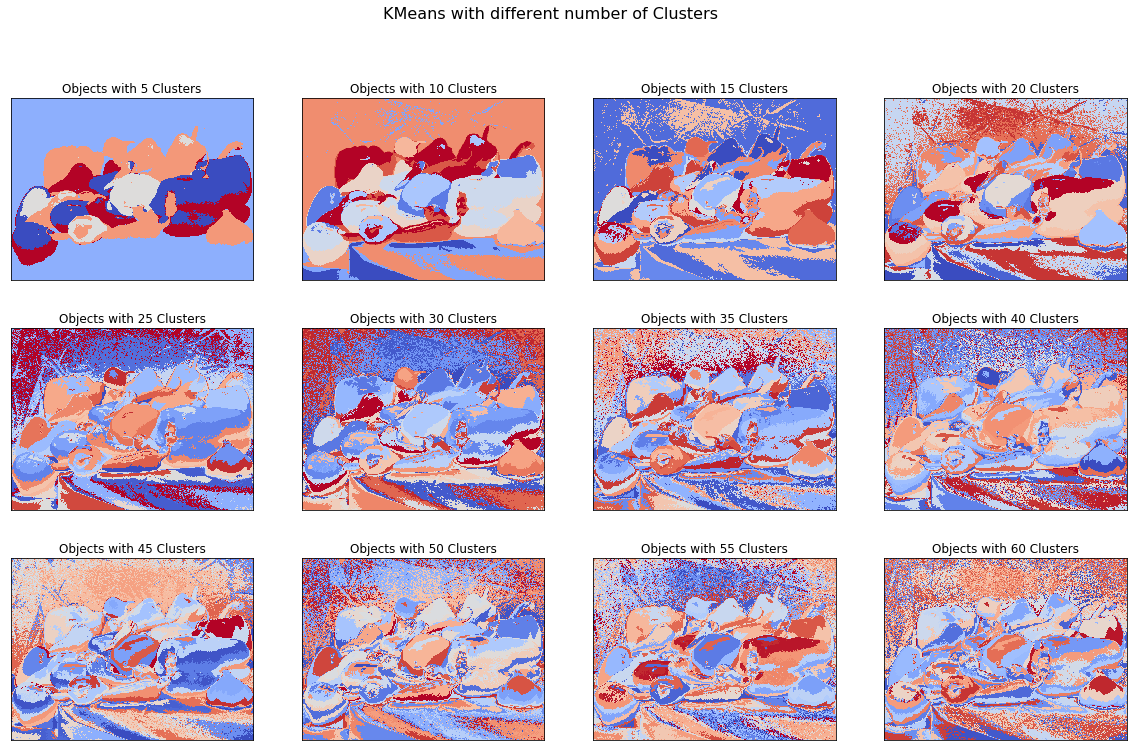

In [22]:
num_clusters = [5,10,15,20,25, 30, 35, 40, 45, 50, 55, 60]

fig, ax = plt.subplots(3, 4,figsize=(20,12))

for i, k in enumerate(num_clusters):
   
    C, L = my_kmeans(k, kmeans_input, 'random')  
    
    ax[i//4, i%4].imshow(L, cmap='coolwarm')
    ax[i//4, i%4].set_title('Objects with {} Clusters'.format(k))
    ax[i//4, i%4].set_xticks([])
    ax[i//4, i%4].set_yticks([])

fig.suptitle("KMeans with different number of Clusters", fontsize=16)
plt.show()

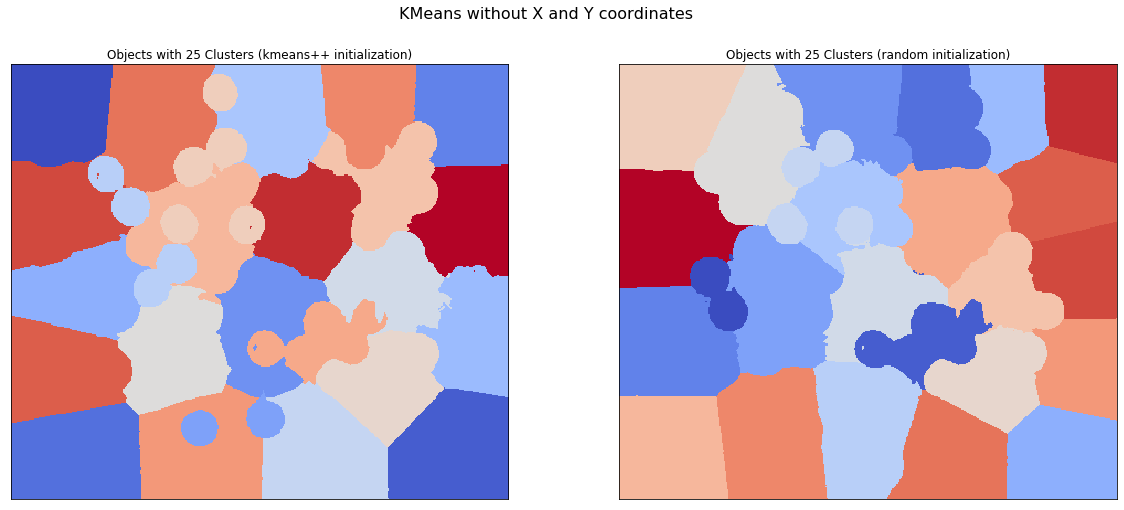

In [109]:
im = plt.imread("mandm.png")  # Read in RGB image 

# Generate 5D vector representation of the image - L*, a*, b*, x-coordinate, y-coordinate
kmeans_input, nrows, ncols = image_to_vector(im, True)
num_pixels = nrows * ncols

k = 25

fig, ax = plt.subplots(1, 2,figsize=(20,8))

for i, method in enumerate(['kmeans++', 'random']):
   
    C, L = my_kmeans(k, kmeans_input, method)  
    
    ax[i].imshow(L, cmap='coolwarm')
    ax[i].set_title('Objects with {} Clusters ({} initialization)'.format(k, method))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.suptitle("KMeans without X and Y coordinates", fontsize=16)
plt.show()

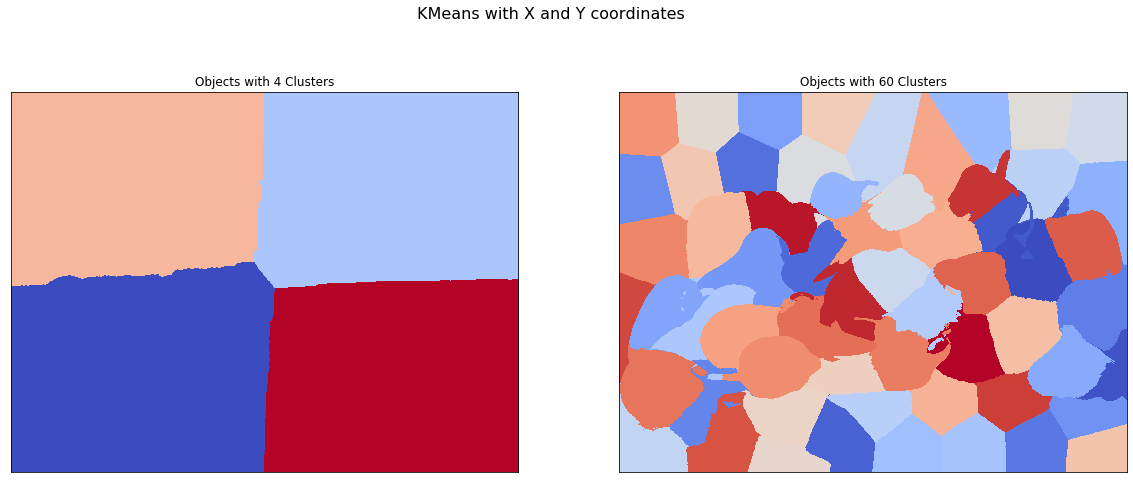

In [75]:
im = plt.imread("peppers.png")  # Read in RGB image 

# Generate 5D vector representation of the image - L*, a*, b*, x-coordinate, y-coordinate
kmeans_input, nrows, ncols = image_to_vector(im, True)
num_pixels = nrows * ncols

num_clusters = [4,60]

fig, ax = plt.subplots(1, 2,figsize=(20,8))

for i, k in enumerate(num_clusters):
   
    C, L = my_kmeans(k, kmeans_input, 'random')  
    
    ax[i].imshow(L, cmap='coolwarm')
    ax[i].set_title('Objects with {} Clusters'.format(k))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.suptitle("KMeans with X and Y coordinates", fontsize=16)
plt.show()

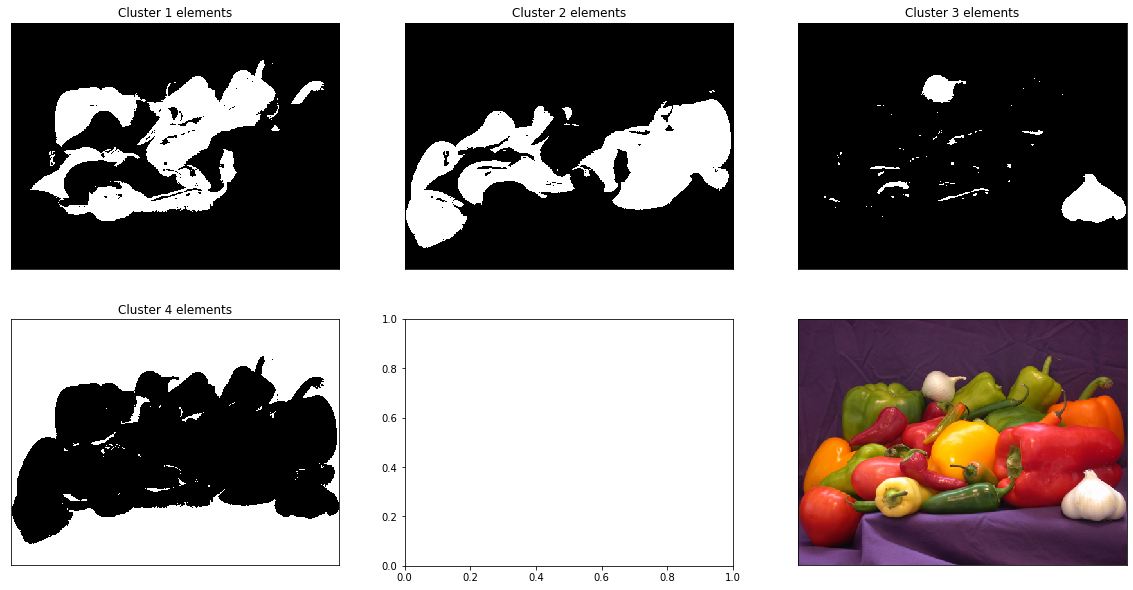

In [89]:
im = plt.imread("peppers.png")  # Read in RGB image 

# Generate 5D vector representation of the image - L*, a*, b*, x-coordinate, y-coordinate
kmeans_input, nrows, ncols = image_to_vector(im, False)
num_pixels = nrows * ncols

k = 4

no = 3

C, L = my_kmeans(k, kmeans_input, 'random')

fig, ax = plt.subplots(2, no, figsize=(20,10))

for i in range(k):
   
#     C, L = my_kmeans(k, kmeans_input, 'random')  
    
    ax[i//no, i%no].imshow((L == ib), cmap='gray')
    ax[i//no, i%no].set_title('Cluster {} elements'.format(i+1))
    ax[i//no, i%no].set_xticks([])
    ax[i//no, i%no].set_yticks([])
    
ax[1,2].imshow(im)
ax[1,2].set_xticks([])
ax[1,2].set_yticks([])

# fig.suptitle("KMeans without X and Y coordinates", fontsize=16)
plt.show()

# plt.imshow(L == 1, cmap='gray')

In [93]:
import time

In [99]:
im = plt.imread("peppers.png")  # Read in RGB image 

# Generate 5D vector representation of the image - L*, a*, b*, x-coordinate, y-coordinate
kmeans_input, nrows, ncols = image_to_vector(im, True)
num_pixels = nrows * ncols

peppers_time_plus = []
peppers_time_random = []

num_clusters = np.arange(2, 102, 4)

for k in num_clusters:
    
    random_time_1 = time.time()    
    C, L = my_kmeans(k, kmeans_input, 'random')
    random_time_2 = time.time() 

    peppers_time_random.append(random_time_2 - random_time_1)

    plus_time_1 = time.time()    
    C, L = my_kmeans(k, kmeans_input, 'kmeans++')
    plus_time_2 = time.time() 

    peppers_time_plus.append(plus_time_2 - plus_time_1)

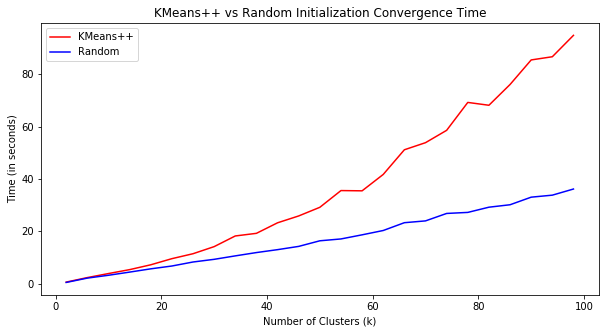

In [103]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(num_clusters, peppers_time_plus, color='red')
ax.plot(num_clusters, peppers_time_random, color='blue')
ax.legend(['KMeans++', 'Random'])
ax.set_title("KMeans++ vs Random Initialization Convergence Time")
ax.set_ylabel("Time (in seconds)")
ax.set_xlabel("Number of Clusters (k)")

plt.show()

In [101]:
im = plt.imread("mandm.png")  # Read in RGB image 

# Generate 5D vector representation of the image - L*, a*, b*, x-coordinate, y-coordinate
kmeans_input, nrows, ncols = image_to_vector(im, True)
num_pixels = nrows * ncols

mnm_time_plus = []
mnm_time_random = []

num_clusters = np.arange(2, 102, 4)

for k in num_clusters:
    
    random_time_1 = time.time()    
    C, L = my_kmeans(k, kmeans_input, 'random')
    random_time_2 = time.time() 

    mnm_time_random.append(random_time_2 - random_time_1)

    plus_time_1 = time.time()    
    C, L = my_kmeans(k, kmeans_input, 'kmeans++')
    plus_time_2 = time.time() 

    mnm_time_plus.append(plus_time_2 - plus_time_1)

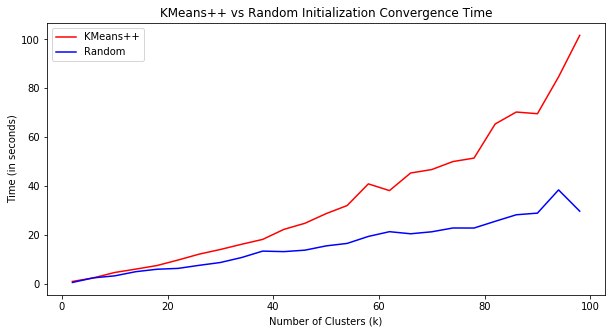

In [104]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(num_clusters, mnm_time_plus, color='red')
ax.plot(num_clusters, mnm_time_random, color='blue')
ax.legend(['KMeans++', 'Random'])
ax.set_title("KMeans++ vs Random Initialization Convergence Time")
ax.set_ylabel("Time (in seconds)")
ax.set_xlabel("Number of Clusters (k)")

plt.show()